In [1]:
!pip install graphviz==0.20.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importação de dados**

In [2]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


## Tratamento e conversão de dados

In [3]:
#Renomear as colunas
a_renomear = {
    'mileage_per_year': "milhas_por_ano",
    "model_year": "ano_do_modelo",
    "price": "preco",
    "sold": "vendido"
}

dados = dados.rename(columns = a_renomear)

In [4]:
#Faz a troca de sim e não por 0 e 1
a_trocar ={
    "no": 0,
    "yes": 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
from datetime import datetime

#achar a idade do veículo
ano_atual = datetime.today().year
dados['idade_do_modelo'] =  ano_atual - dados.ano_do_modelo
dados.head()

#Achar a quilometragem -> converer milhas para quilometros
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934

#exclui da tabela as colunas que não desejamos trabalhar
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano","ano_do_modelo"], axis = 1)

dados.head()


,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


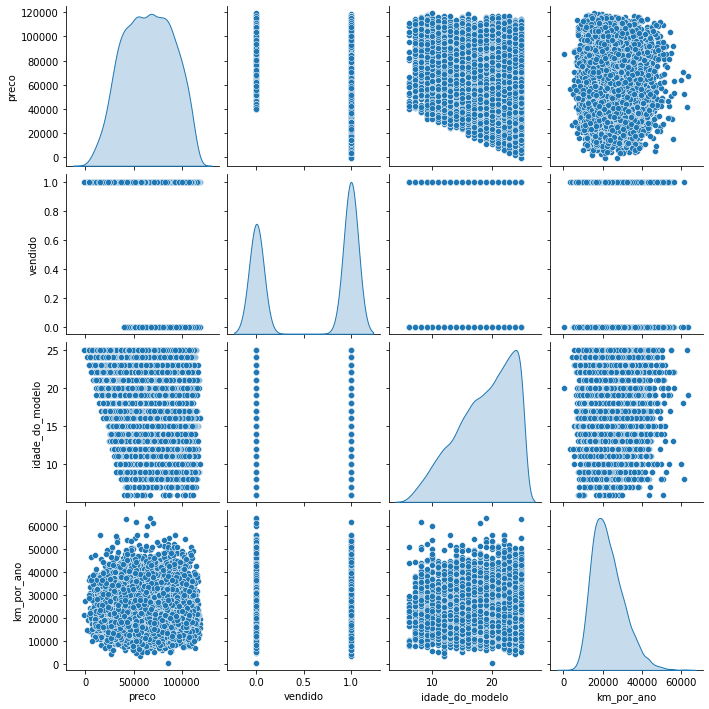

In [6]:
import seaborn as sns
#Plotagem comparativa dos gráficos
sns.pairplot(dados[["preco", 'vendido','idade_do_modelo','km_por_ano']], diag_kind="kde")

## Classificação

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#caracteristicas
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados[["vendido"]]

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinamento feito com %d elementos e teste feito com %d elementos" %(len(raw_treino_x), (len(raw_teste_x))))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC()
modelo.fit(treino_x, treino_y)
previsao = modelo.predict(teste_x)

#teste do modelo
acuracia = accuracy_score(teste_y, previsao) * 100
print("A acurácia do modelo foi de %.2f%%" % acuracia)



Treinamento feito com 7500 elementos e teste feito com 2500 elementos


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A acurácia do modelo foi de 77.48%


## Verificação da acurácia do modelo
usando sklearn.dummy

In [9]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)

acuracia = dummy_stratified.score(teste_x, teste_y) * 100
print("A acurácia do dummy stratified foi de %.2f%%" % acuracia)

A acurácia do dummy stratified foi de 58.00%


## Decision Tree Classifier
sklearn decision tree

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

#caracteristicas
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados[["vendido"]]

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinamento feito com %d elementos e teste feito com %d elementos" %(len(raw_treino_x), (len(raw_teste_x))))

modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(raw_treino_x, treino_y)
previsao = modelo.predict(raw_teste_x)

#teste do modelo
acuracia = accuracy_score(teste_y, previsao) * 100
print("A acurácia do modelo foi de %.2f%%" % acuracia)


Treinamento feito com 7500 elementos e teste feito com 2500 elementos
A acurácia do modelo foi de 79.28%


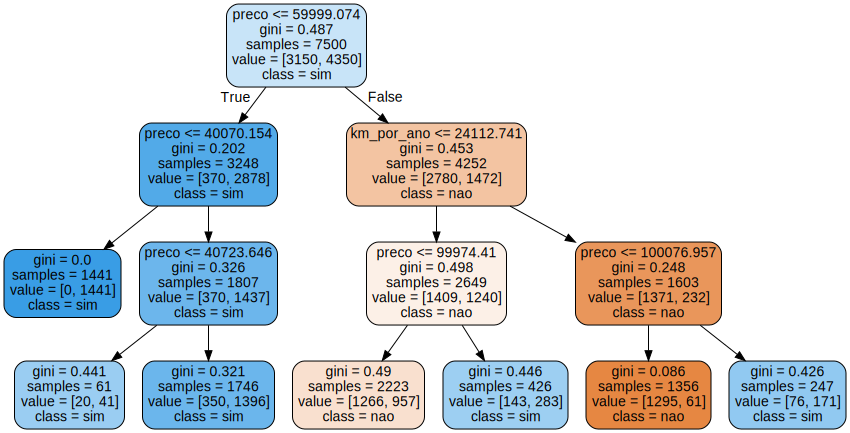

In [29]:
from sklearn.tree import DecisionTreeClassifier
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file = None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ['nao','sim'])
grafico = graphviz.Source(dot_data)
grafico